In [12]:
# ---------- IMPORT LIBRARIES ----------------------

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score 

import graphviz

In [14]:
def preprocessData(data):
    data = data.replace('Unknown', np.nan)
    data.dropna(inplace=True)
    
    le = preprocessing.LabelEncoder()
    for column_name in data.columns:
        if data[column_name].dtype == object:
            data[column_name] = le.fit_transform(data[column_name])
        else:
            pass
    
    return data

In [15]:
# ---------- IMPORTING DATA ----------------------

In [18]:
propertyData = pd.read_csv("property_prices.csv")


propertyData['lowBand'], propertyData['highBand'] = propertyData['price_bands'].str.split('-', 1).str
propertyData['lowBand'] = propertyData['lowBand'].str[:-1]
propertyData['highBand'] = propertyData['highBand'].str[:-1]

propertyData = preprocessData(propertyData)


In [ ]:
# ---------- VISUALIZING DATA ----------------------

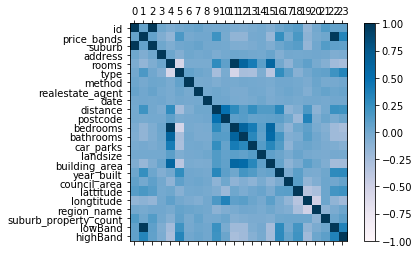

In [28]:
#visualizing correlation plot
correlations = propertyData.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0,24,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(propertyData.columns, minor = True)
ax.set_yticklabels(propertyData.columns)
plt.show()